Titanic

# Setup

## Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler

from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

## Define function

In [2]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [3]:
def plot_learning_curve_only(
    estimator,
    title,
    X,
    y,
    ax,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    ax.grid()
    ax.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    ax.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    ax.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    ax.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    ax.legend(loc="best")

    return plt

# Get the Data

In [4]:
TRAIN_PATH = "./train.csv"

def load_train_data(train_path=TRAIN_PATH):
    csv_path = train_path
    return pd.read_csv(csv_path)

data = load_train_data()

# Take a Quick Look at the Data Structure

## An Overview of the Data

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Visualize the Data

### `PassengerId`, `Name`, `Ticket`, and `Cabin` - not picked

In [6]:
data["Ticket"]

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [7]:
data["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

### `Survived` - target

In [8]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Our target

### `Pclass` and `Sex` and `Embarked` - picked

In [9]:
data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

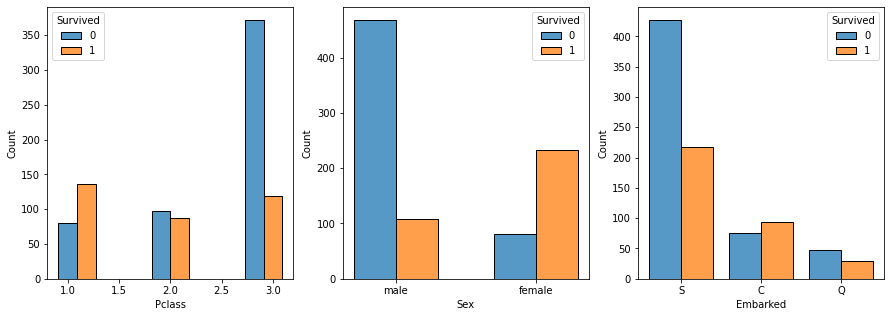

In [12]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.histplot(data=data, x="Pclass", hue="Survived", multiple="dodge", shrink=2.0)
plt.subplot(132)
sns.histplot(data=data, x="Sex", hue="Survived", multiple="dodge", shrink=.6)
plt.subplot(133)
sns.histplot(data=data, x="Embarked", hue="Survived", multiple="dodge", shrink=.8)

plt.show()

### `Age` and `Fare` - picked

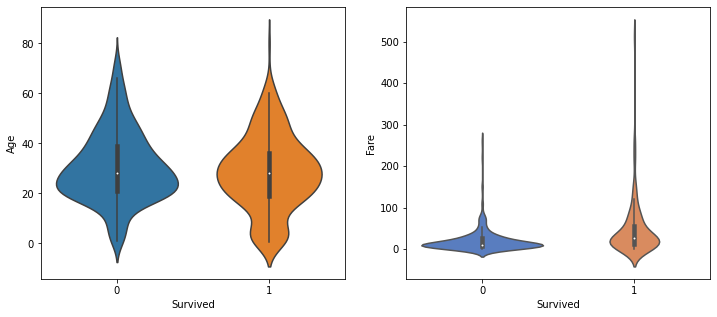

In [13]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
sns.violinplot(x="Survived", y="Age", data=data, split=True)
plt.subplot(122)
sns.violinplot(x="Survived", y="Fare", data=data, split=True, palette="muted")

plt.show()

### `SibSp` and `Parch` - cut

In [14]:
data["SibSp_cut"] = pd.cut(data["SibSp"],
                           bins=[-0.1, 0.9, 1.9, np.inf], 
                           labels=[0, 1, 2])

data["Parch_cut"] = pd.cut(data["Parch"],
                           bins=[-0.1, 0.9, 1.9, np.inf], 
                           labels=[0, 1, 2])

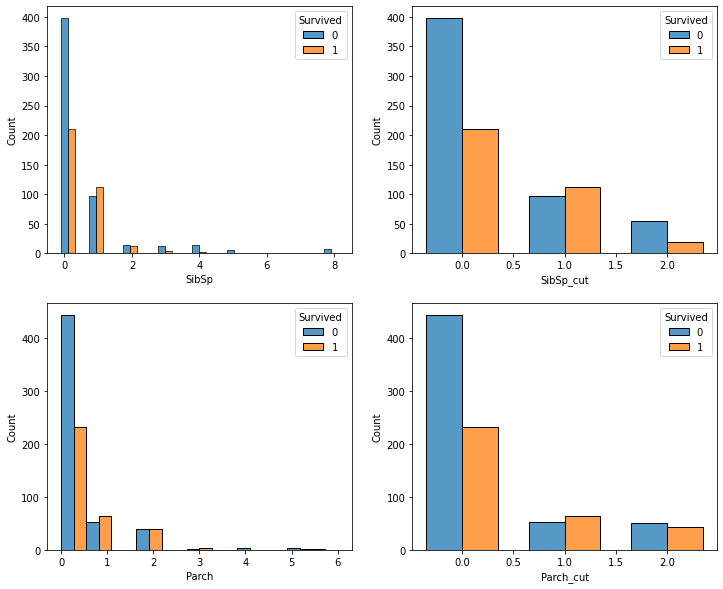

In [15]:
plt.figure(figsize=(12, 10))

plt.subplot(221)
sns.histplot(data=data, x="SibSp", hue="Survived", multiple="dodge", shrink=2)
plt.subplot(222)
sns.histplot(data=data, x="SibSp_cut", hue="Survived", multiple="dodge", shrink=0.7)

plt.subplot(223)
sns.histplot(data=data, x="Parch", hue="Survived", multiple="dodge")
plt.subplot(224)
sns.histplot(data=data, x="Parch_cut", hue="Survived", multiple="dodge", shrink=0.7)

plt.show()

# Prepare the Data

In [5]:
imputer = SimpleImputer(strategy="median")

data["Age_filled"] = imputer.fit_transform(data.Age.to_numpy().reshape(-1, 1))

In [6]:
data["SibSp_cut"] = pd.cut(data["SibSp"],
                           bins=[-0.1, 0.9, 1.9, np.inf], 
                           labels=[0, 1, 2])

data["Parch_cut"] = pd.cut(data["Parch"],
                           bins=[-0.1, 0.9, 1.9, np.inf], 
                           labels=[0, 1, 2])

In [7]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_filled',
       'SibSp_cut', 'Parch_cut'],
      dtype='object')

# How to preprocess the Data?(with logistic classification)

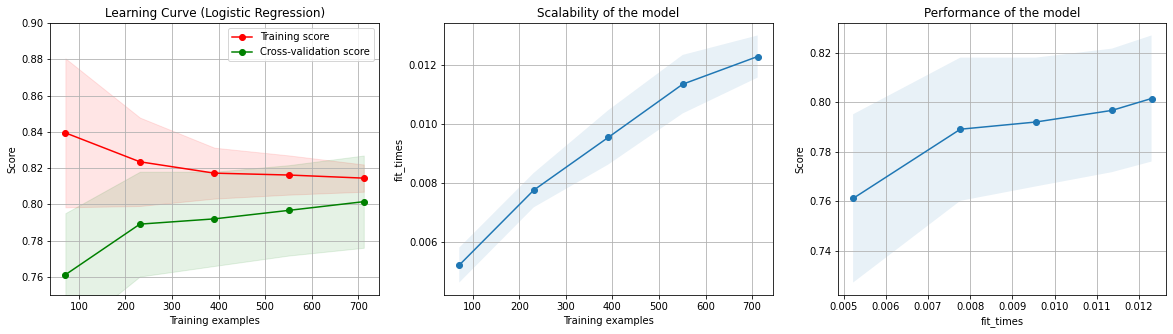

In [156]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler()),
  ])

num_attribs = ["Age", "Fare"]
cat_attribs = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

X = full_pipeline.fit_transform(data)
y = data["Survived"].to_numpy()


title = "Learning Curve (Logistic Regression)"
clf = LogisticRegression(random_state=42)

cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=42)
plot_learning_curve(
    clf, title, X, y, ylim=(0.75, 0.9), cv=cv, n_jobs=4
)

plt.show()

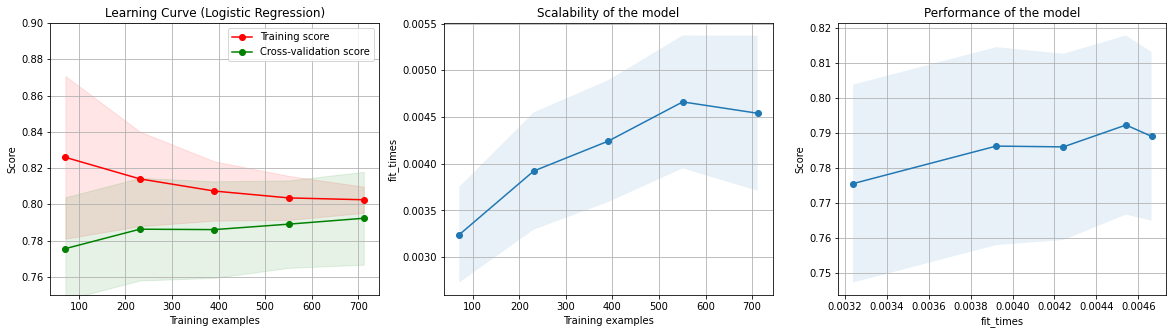

In [157]:
num_attribs = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
cat_attribs = [ "Sex", "Embarked"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

X = full_pipeline.fit_transform(data)
y = data["Survived"].to_numpy()

title = "Learning Curve (Logistic Regression)"
clf = LogisticRegression(random_state=42)

cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=42)
plot_learning_curve(
    clf, title, X, y, ylim=(0.75, 0.9), cv=cv, n_jobs=4
)

plt.show()

Better to consider `Pclass`, `Age`, `SibSp`, `Parch` as categorical features

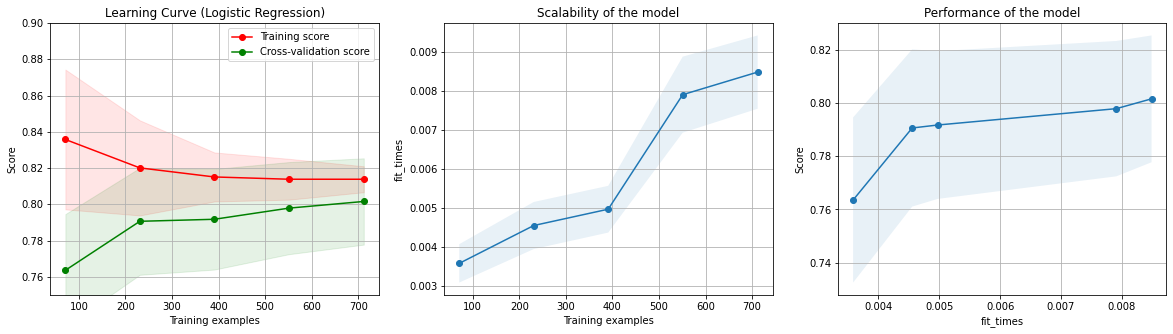

In [161]:
num_attribs = ["Age", "Fare"]
cat_attribs = ["Pclass", "Sex", "SibSp_cut", "Parch_cut", "Embarked"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

X = full_pipeline.fit_transform(data)
y = data["Survived"].to_numpy()


title = "Learning Curve (Logistic Regression)"
clf = LogisticRegression(random_state=42)

cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=42)
plot_learning_curve(
    clf, title, X, y, ylim=(0.75, 0.9), cv=cv, n_jobs=4
)

plt.show()

slight improve when cut `SibSp` and `Parch`

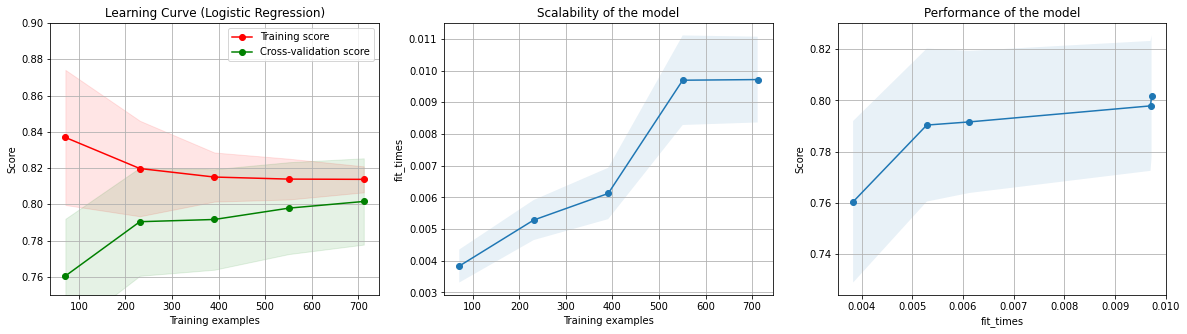

In [218]:
std_num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler()),
])
robust_num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("robust_scaler", RobustScaler()),
])

std_num_attribs = ["Age"]
robust_num_attribs = ["Fare"]
cat_attribs = ["Pclass", "Sex", "SibSp_cut", "Parch_cut", "Embarked"]

full_pipeline = ColumnTransformer([
    ("std_num", std_num_pipeline, std_num_attribs),
    ("robust_num", robust_num_pipeline, robust_num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

X = full_pipeline.fit_transform(data)
y = data["Survived"].to_numpy()

title = "Learning Curve (Logistic Regression)"
clf = LogisticRegression(random_state=42)

cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=42)
plot_learning_curve(
    clf, title, X, y, ylim=(0.75, 0.9), cv=cv, n_jobs=4
)

plt.show()

## Best Strategy

In [80]:
std_num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler()),
])
robust_num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("robust_scaler", RobustScaler()),
])

std_num_attribs = ["Age"]
robust_num_attribs = ["Fare"]
cat_attribs = ["Pclass", "Sex", "SibSp_cut", "Parch_cut", "Embarked"]

full_pipeline = ColumnTransformer([
    ("std_num", std_num_pipeline, std_num_attribs),
    ("robust_num", robust_num_pipeline, robust_num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

X = full_pipeline.fit_transform(data)
y = data["Survived"].to_numpy()

logistic_clf = LogisticRegression(random_state=42)

score = cross_val_score(logistic_clf, X, y, cv=5)

print("cross val score:", score)
print("mean:", score.mean())

cross val score: [0.80446927 0.81460674 0.79775281 0.78651685 0.8258427 ]
mean: 0.8058376749733224


# Decision Tree

## Prepare the Data

In [43]:
mask = ["Pclass", "Age_filled", "SibSp_cut", "Parch_cut", "Fare"]
cat_attribs = ["Sex", "Embarked"]

encoder = OneHotEncoder()
cat = encoder.fit_transform(data[cat_attribs]).toarray()

X = np.concatenate((data[mask].to_numpy(), cat), axis=1)
y = data["Survived"].to_numpy()

## Train and Test the Model

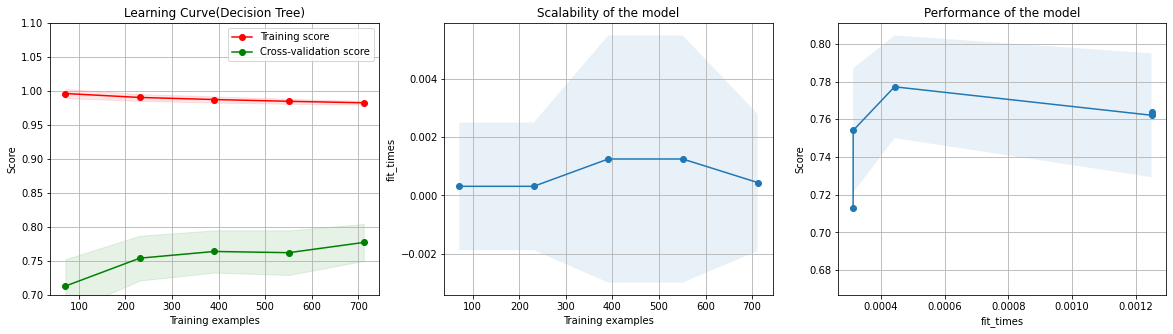

In [52]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier()

title = "Learning Curve(Decision Tree)"
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=42)
plot_learning_curve(
    tree_clf, title, X, y, ylim=(0.7, 1.1), cv=cv, n_jobs=4
)

plt.show()

over_fitted!

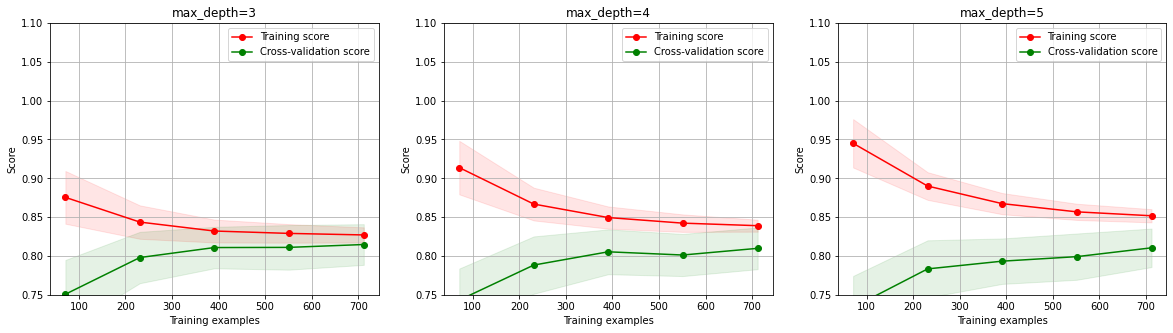

In [55]:
def learning_curve_max_depth(X, y, max_depthes=[3, 4, 5]):
    n = len(max_depthes)
    _, axes = plt.subplots(1, n, figsize=(20, 5))
    
    cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=42)
    for i in range(n):
        plt.subplot(1, n, i+1)
        max_depth = max_depthes[i]
        tree_clf = tree.DecisionTreeClassifier(max_depth=max_depth)
        title = ("max_depth=%d"%max_depth)
        plot_learning_curve_only(
            tree_clf, title, X, y, 
            axes[i], ylim=(0.75, 1.1), cv=cv, n_jobs=4,
        )
    
learning_curve_max_depth(X, y)

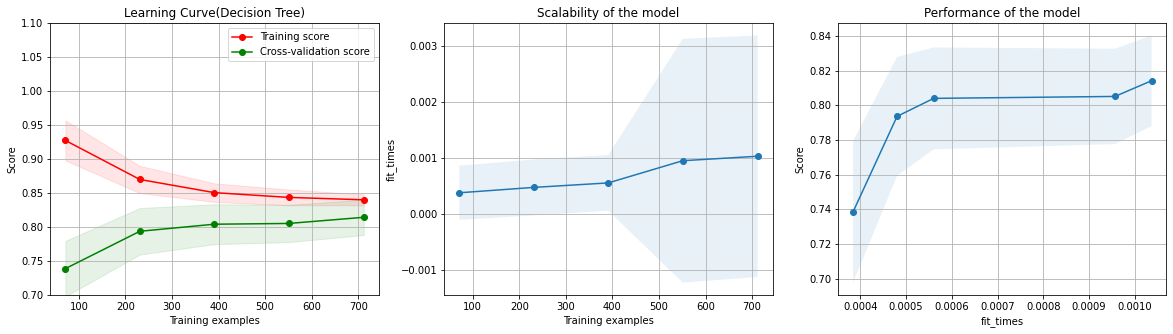

In [71]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(
    max_depth=10,
    max_leaf_nodes=10,
)

title = "Learning Curve(Decision Tree)"
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=42)
plot_learning_curve(
    tree_clf, title, X, y, ylim=(0.7, 1.1), cv=cv, n_jobs=4
)

plt.show()

## Best Strategy

In [81]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(
    max_depth=10,
    max_leaf_nodes=10,
)

score = cross_val_score(tree_clf, X, y, cv=5)

print("cross val score:", score)
print("mean:", score.mean())

cross val score: [0.82122905 0.82022472 0.82022472 0.79213483 0.84831461]
mean: 0.8204255853367648


# ANN

In [8]:
std_num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler()),
])
robust_num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("robust_scaler", RobustScaler()),
])

std_num_attribs = ["Age"]
robust_num_attribs = ["Fare"]
cat_attribs = ["Pclass", "Sex", "SibSp_cut", "Parch_cut", "Embarked"]

full_pipeline = ColumnTransformer([
    ("std_num", std_num_pipeline, std_num_attribs),
    ("robust_num", robust_num_pipeline, robust_num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

X = full_pipeline.fit_transform(data)
y = data["Survived"].to_numpy()

In [9]:
X.shape

(891, 17)

In [10]:
import keras
import tensorflow as tf

from keras import layers

In [64]:
def build_model(n_hidden=3, n_neurons=30, 
                learning_rate=1e-3, input_shape=[17]):
    model = keras.models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    
    for layer in range(n_hidden):
        model.add(layers.Dense(n_neurons, activation="relu"))
        
    model.add(layers.Dense(1, activation="sigmoid"))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    
    
    return model

In [72]:
earlystopping = keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=20,
    mode="max",
)

params = {
    "x": X, "y": y,
    "batch_size": 32, "epochs": 100,
    "validation_split": 0.1,
    "callbacks": [earlystopping],
    "verbose": 0,
}
history = model.fit(**params)

<AxesSubplot:>

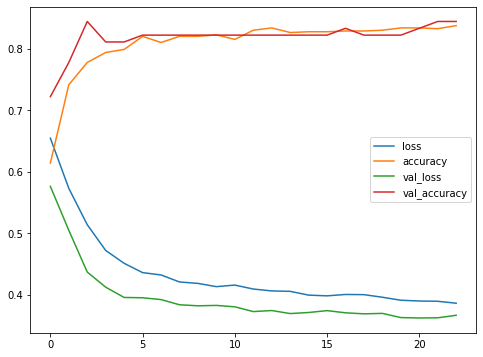

In [67]:
pd.DataFrame(history.history).plot(figsize=(8, 6))

In [87]:
list_n_neurons = [10, 100, 200]
list_n_hidden = [3, 10, 100]
shape = (len(list_n_neurons), len(list_n_hidden))
score = np.empty(shape)

for (i, n_hidden) in enumerate(list_n_hidden):
    for (j, n_neurons) in enumerate(list_n_neurons):
        model = build_model(n_hidden=n_hidden, n_neurons=n_neurons)
        model.fit(**params)
        score[i, j] = model.evaluate(X, y)[1]

28/28 [==============================] - 0s 6ms/step - loss: 0.6659 - accuracy: 0.6162


In [96]:
earlystopping = keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=20,
    mode="max",
)

params = {
    "x": X, "y": y,
    "batch_size": 64, "epochs": 100,
    "validation_split": 0.1,
    "callbacks": [earlystopping],
    "verbose": 0,
}

model = build_model(n_hidden=10, n_neurons=100)
model.fit(**params)
model.evaluate(X, y)

28/28 [==============================] - 0s 630us/step - loss: 0.2882 - accuracy: 0.8844


[0.28815022110939026, 0.8843995332717896]

In [107]:
model = build_model(n_hidden=10, n_neurons=100, learning_rate=1e-2)
model.fit(**params)
model.evaluate(X, y)

28/28 [==============================] - 0s 667us/step - loss: 0.3535 - accuracy: 0.8563


[0.35346174240112305, 0.8563411831855774]